# Customer Segmentation using K-Means Clustering

## Project Goal
To use unsupervised machine learning techniques to identify distinct groups of customers based on their purchasing and demographic behavior, allowing for targeted marketing strategies.

## Dataset: Mall Customer Data
* **Source:** A synthetic dataset commonly used for clustering exercises.
* **Size:** 200 rows, 5 columns.
* **Key Features:**
    * **Annual Income (k\$):** The customer's annual income in thousands of dollars.
    * **Spending Score (1-100):** A score assigned by the mall based on customer behavior and purchase nature (higher score means higher spending).
    * **Age** and **Gender:** Demographic features used for initial exploration.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Mall_Customers.csv')

#  1. Exploratory Data Analysis (EDA) and Preprocessing

We begin by inspecting the data types, checking for missing values, and visualizing the distribution of the key features. Understanding the data's shape and distribution is essential before applying any clustering algorithm. The initial histograms help us identify the range and spread of Age, Income, and Spending Score.

In [17]:
print(df.info())
print(df.isnull().sum()) # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


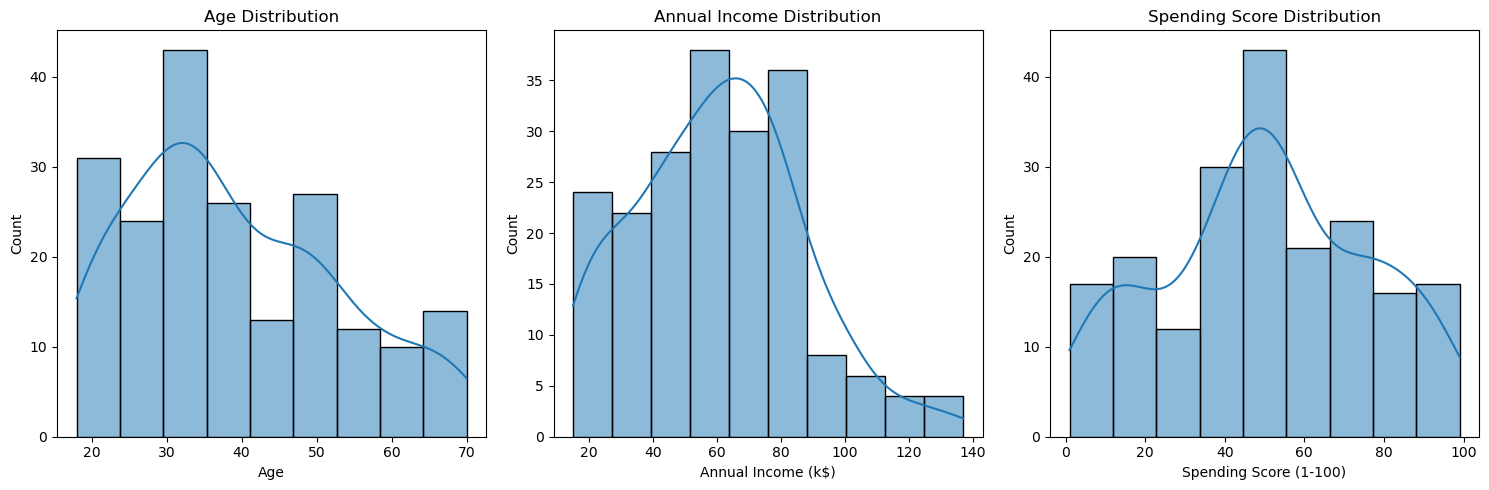

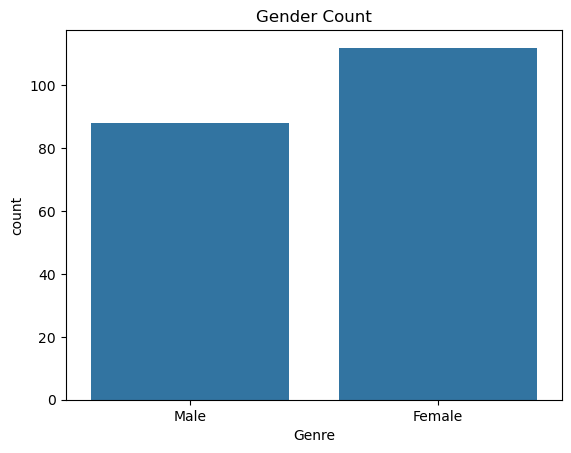

In [18]:
# Histograms for key numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()

# Visualize Gender Distribution
sns.countplot(x='Genre', data=df)
plt.title('Gender Count')
plt.show()

In [19]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#  2. Feature Selection and Standardization

For segmentation, we will focus on the two most relevant business metrics: **Annual Income** and **Spending Score**.

**Standardization Rationale:**
K-Means is a distance-based algorithm. If features are on vastly different scales (e.g., Age 20-70 vs. Income 15k-137k), the feature with the larger range will dominate the distance calculation. We use `StandardScaler` to transform the data so that it has a mean of 0 and a standard deviation of 1, ensuring all features contribute equally to the cluster formation.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

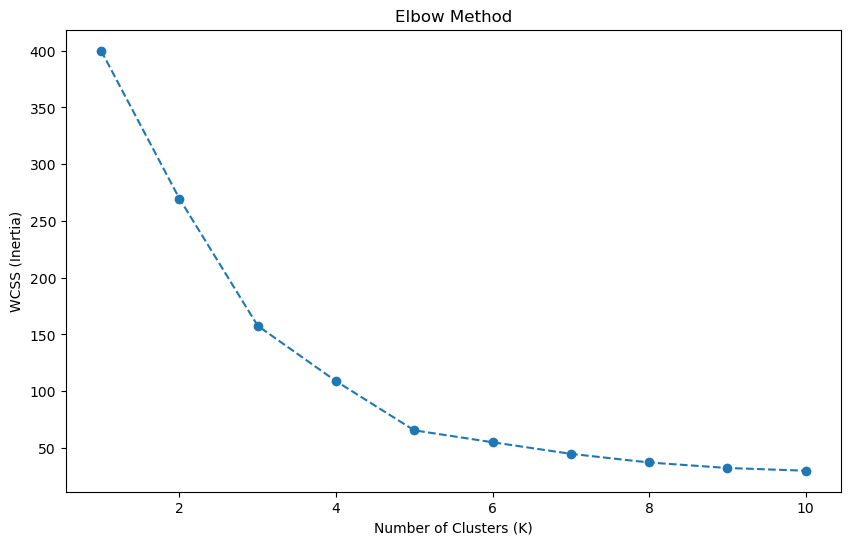

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.show()
# Based on the common Mall Customer data, K=5 is usually the "elbow".

#  3. Determining the Optimal Number of Clusters (K)

Choosing the correct number of clusters ($K$) is critical for effective K-Means. We employ two methods to validate our choice:

### The Elbow Method (Inertia)
The Elbow Method calculates the Within-Cluster Sum of Squares (WCSS) for a range of $K$ values. The 'elbow' point is where the rate of decrease in WCSS slows down significantly, indicating the optimal $K$. We look for the bend in the curve.

### Silhouette Score
The Silhouette Score measures how well an object is clustered. Scores closer to +1 indicate compact, well-separated clusters, while scores near 0 indicate overlapping clusters. We will use this metric to validate the $K$ value suggested by the Elbow Method.

In [23]:
# Example for K=5 (if that was your Elbow choice)
kmeans_test = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
kmeans_test.fit(X_scaled)
score = silhouette_score(X_scaled, kmeans_test.labels_)
print(f'Silhouette Score for K=5: {score:.3f}')
# Check this for a few values of K (e.g., K=4, 5, 6) and select the highest.

Silhouette Score for K=5: 0.555


In [24]:
# Assuming the Elbow Method suggested K=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

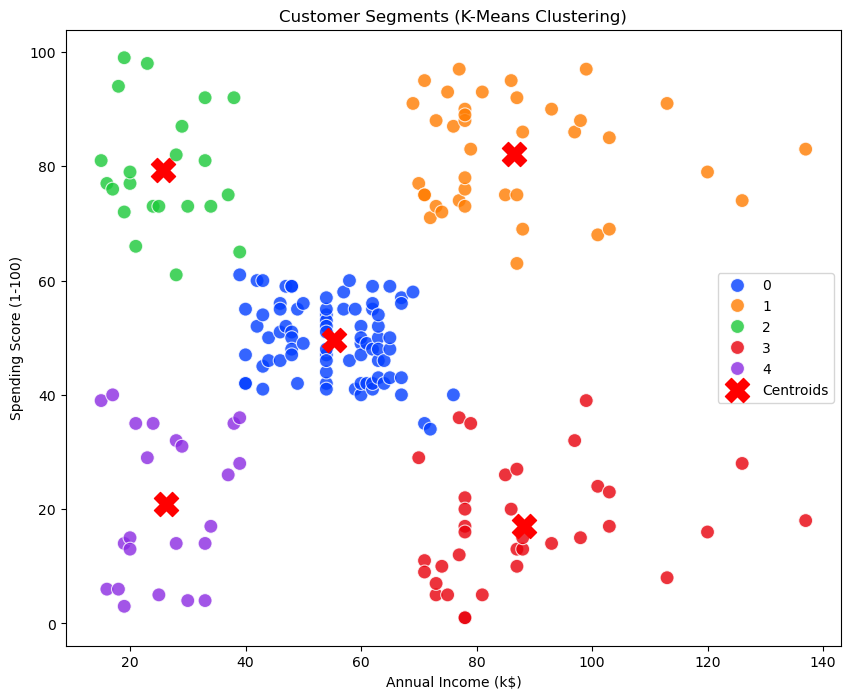

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df,
                palette='bright', s=100, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=300, c='red', marker='X', label='Centroids') # Plotting original scale centroids
plt.title('Customer Segments (K-Means Clustering)')
plt.legend()
plt.show()

#  4. Cluster Analysis and Business Interpretation

We train the final K-Means model with $K=5$ (based on the Elbow/Silhouette analysis). The resulting scatter plot visually confirms five distinct, well-separated customer groups. 

Below is a summary of the mean values for each cluster, allowing us to profile the segments and assign descriptive names for marketing purposes.

## **Segment Profiles**

| Cluster | Income | Spending Score | Demographic Profile | Suggested Strategy |
| :--- | :--- | :--- | :--- | :--- |
| **Cluster 0** | **High** | **Low** | **The Averse Spenders** | Focus on retention, loyalty programs, and personalized outreach to increase store engagement. |
| **Cluster 1** | **Low** | **Low** | **The Frugal Shoppers** | Target with economy products, bulk deals, and essential items. |
| **Cluster 2** | **High** | **High** | **The VIP Targets** | Reward programs, exclusive early access, personalized luxury offers. **Highest priority segment.** |
| **Cluster 3** | **Low** | **High** | **The Spendthrifts** | Utilize time-limited sales and impulse-buy promotions. |
| **Cluster 4** | **Medium** | **Medium** | **The Average Customer** | Standard marketing and seasonal campaigns. |

---

In [13]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
print("\n--- Cluster Profile Summary ---")
print(cluster_summary)


--- Cluster Profile Summary ---
         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 55.296296               49.518519  42.716049
1                 86.538462               82.128205  32.692308
2                 25.727273               79.363636  25.272727
3                 88.200000               17.114286  41.114286
4                 26.304348               20.913043  45.217391
